### Name   : Ibadullah Hayat
### Reg No : B23F0001AI010
### Section : F23 AI-GREEN

## MACHINE LEARNING LAB 04: GRADIENT DESCENT

Objective: Implement and compare the three variants of Gradient Descent-Batch, Stochastic (SGD), and Mini-Batch,on a synthetic linear regression problem. Understand their convergence behavior, computational trade-offs, and sensitivity to hyperparameters.



Step 1: Import Libraries and Define Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

I use only numpy and matplotlib since this lab focuses on understanding the math behind gradient descent, not high-level frameworks.

Step 2: Generate Synthetic Linear Data

In [2]:
def generate_linear_data(n_samples=200, true_w=3.5, true_b=2.0, noise=1.0):
    """Generate synthetic data following y = w*x + b + noise."""
    X = np.random.randn(n_samples) * 10  # Random x values centered at 0, scaled by 10
    y = true_w * X + true_b + np.random.randn(n_samples) * noise
    return X, y

# Generate data
X, y = generate_linear_data(n_samples=200, true_w=3.5, true_b=2.0, noise=1.0)
print(f"Generated {len(X)} samples from true model: y = 3.5x + 2.0 + noise")

Generated 200 samples from true model: y = 3.5x + 2.0 + noise


I create a simple 1D linear relationship so we can visually verify if our GD variants recover the true parameters.

Step 3: Feature Normalization (Critical for GD!)

In [3]:
def normalize_features(X):
    """Normalize features to zero mean and unit variance."""
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean) / std
    return X_norm, mean, std

X_norm, X_mean, X_std = normalize_features(X)
print(f"Feature normalized: mean={X_mean:.4f}, std={X_std:.4f}")

Feature normalized: mean=-0.4077, std=9.2867


Step 4: Train/Test Split

In [4]:
def train_test_split_manual(X, y, test_size=0.2):
    """Split data into train and test sets without sklearn."""
    n = len(X)
    n_test = int(n * test_size)
    indices = np.random.permutation(n)
    test_idx = indices[:n_test]
    train_idx = indices[n_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_manual(X_norm, y, test_size=0.2)
print(f"SplitOptions → Train: {len(X_train)}, Test: {len(X_test)}")

SplitOptions → Train: 160, Test: 40


I avoid sklearn here to keep everything from scratch, as expected in a foundational GD lab.

Step 5: Cost Function (Mean Squared Error)

In [5]:
def compute_cost(X, y, w, b):
    """Compute Mean Squared Error cost: J(w,b) = (1/2m) * Σ(ŷ - y)²"""
    m = len(y)
    predictions = w * X + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

This is the "mountain" we’re trying to descend. Lower cost = better fit.

Step 6: Gradient Computation for All Three Variants

In [6]:
def compute_batch_gradients(X, y, w, b):
    """Batch GD: uses ALL training examples."""
    m = len(y)
    predictions = w * X + b
    errors = predictions - y
    dw = (1 / m) * np.sum(errors * X)
    db = (1 / m) * np.sum(errors)
    return dw, db

def compute_sgd_gradients(X, y, w, b):
    """Stochastic GD: uses ONE random example."""
    idx = np.random.randint(len(y))
    x_i, y_i = X[idx], y[idx]
    prediction = w * x_i + b
    error = prediction - y_i
    dw = error * x_i
    db = error
    return dw, db

def compute_minibatch_gradients(X, y, w, b, batch_size=32):
    """Mini-batch GD: uses a small random subset."""
    indices = np.random.choice(len(y), batch_size, replace=False)
    X_batch, y_batch = X[indices], y[indices]
    predictions = w * X_batch + b
    errors = predictions - y_batch
    dw = (1 / batch_size) * np.sum(errors * X_batch)
    db = (1 / batch_size) * np.sum(errors)
    return dw, db

Key Insight:

Batch: smooth but slow

SGD: fast but noisy

Mini-batch: best of both worlds (used in deep learning)

Step 7: Unified Training Loop


In [7]:
def train_gd(X, y, method='batch', learning_rate=0.01, epochs=1000, batch_size=32):
    """Train using specified GD variant."""
    w, b = 0.0, 0.0  # Start at origin
    cost_history = []

    print(f"\n Training with {method.upper()} Gradient Descent")
    print(f"   Learning Rate: {learning_rate}, Epochs: {epochs}")
    if method == 'mini-batch':
        print(f"   Batch Size: {batch_size}")

    for epoch in range(epochs):
        if method == 'batch':
            dw, db = compute_batch_gradients(X, y, w, b)
        elif method == 'stochastic':
            dw, db = compute_sgd_gradients(X, y, w, b)
        elif method == 'mini-batch':
            dw, db = compute_minibatch_gradients(X, y, w, b, batch_size)
        else:
            raise ValueError("Method must be 'batch', 'stochastic', or 'mini-batch'")

        # Update parameters (step downhill!)
        w -= learning_rate * dw
        b -= learning_rate * db

        # Track cost every 100 epochs
        if epoch % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"   Epoch {epoch:4d}: w={w:6.3f}, b={b:6.3f}, cost={cost:8.4f}")

    final_cost = compute_cost(X, y, w, b)
    print(f"\nFinal Parameters → w={w:.4f}, b={b:.4f}, Final Cost={final_cost:.4f}")
    return w, b, cost_history

The update rule w = w - η * dw is the core of gradient descent-it moves parameters opposite to the gradient (downhill).

Step 8: Train All Three Variants


In [8]:
# Train Batch GD (stable, higher LR)
w_batch, b_batch, cost_batch = train_gd(
    X_train, y_train, method='batch', learning_rate=0.1, epochs=1000
)

# Train SGD (noisy, lower LR)
w_sgd, b_sgd, cost_sgd = train_gd(
    X_train, y_train, method='stochastic', learning_rate=0.01, epochs=1000
)

# Train Mini-batch GD (balanced)
w_mini, b_mini, cost_mini = train_gd(
    X_train, y_train, method='mini-batch', learning_rate=0.1, epochs=1000, batch_size=32
)


 Training with BATCH Gradient Descent
   Learning Rate: 0.1, Epochs: 1000
   Epoch    0: w= 3.349, b= 0.083, cost=440.3780
   Epoch  100: w=32.606, b= 0.666, cost=  0.5411
   Epoch  200: w=32.607, b= 0.666, cost=  0.5411
   Epoch  300: w=32.607, b= 0.666, cost=  0.5411
   Epoch  400: w=32.607, b= 0.666, cost=  0.5411
   Epoch  500: w=32.607, b= 0.666, cost=  0.5411
   Epoch  600: w=32.607, b= 0.666, cost=  0.5411
   Epoch  700: w=32.607, b= 0.666, cost=  0.5411
   Epoch  800: w=32.607, b= 0.666, cost=  0.5411
   Epoch  900: w=32.607, b= 0.666, cost=  0.5411

Final Parameters → w=32.6067, b=0.6656, Final Cost=0.5411

 Training with STOCHASTIC Gradient Descent
   Learning Rate: 0.01, Epochs: 1000
   Epoch    0: w= 0.006, b= 0.050, cost=546.6177
   Epoch  100: w=19.843, b=-0.599, cost= 85.0785
   Epoch  200: w=28.403, b=-0.017, cost=  9.8643
   Epoch  300: w=31.110, b= 0.621, cost=  1.6923
   Epoch  400: w=32.040, b= 0.595, cost=  0.7089
   Epoch  500: w=32.457, b= 0.636, cost=  0.5530
 

 Hyperparameter Note:

Batch GD can use a larger learning rate (0.1) because gradients are stable.
SGD needs a smaller rate (0.01) to avoid overshooting due to noise.
Mini-batch behaves like Batch GD, so 0.1 works well.

Step 9: Evaluate on Test Set

In [10]:
test_cost_batch = compute_cost(X_test, y_test, w_batch, b_batch)
test_cost_sgd   = compute_cost(X_test, y_test, w_sgd,   b_sgd)
test_cost_mini  = compute_cost(X_test, y_test, w_mini,  b_mini)

print("\n Test Set Performance (Lower is Better):")
print(f"   Batch GD      : {test_cost_batch:.4f}")
print(f"   Stochastic GD : {test_cost_sgd:.4f}")
print(f"   Mini-batch GD : {test_cost_mini:.4f}")


 Test Set Performance (Lower is Better):
   Batch GD      : 0.2374
   Stochastic GD : 0.2405
   Mini-batch GD : 0.2370


All methods should achieve similar test costs if trained properly-showing they all converge to the same solution.

Step 10: Visualize Convergence Behavior

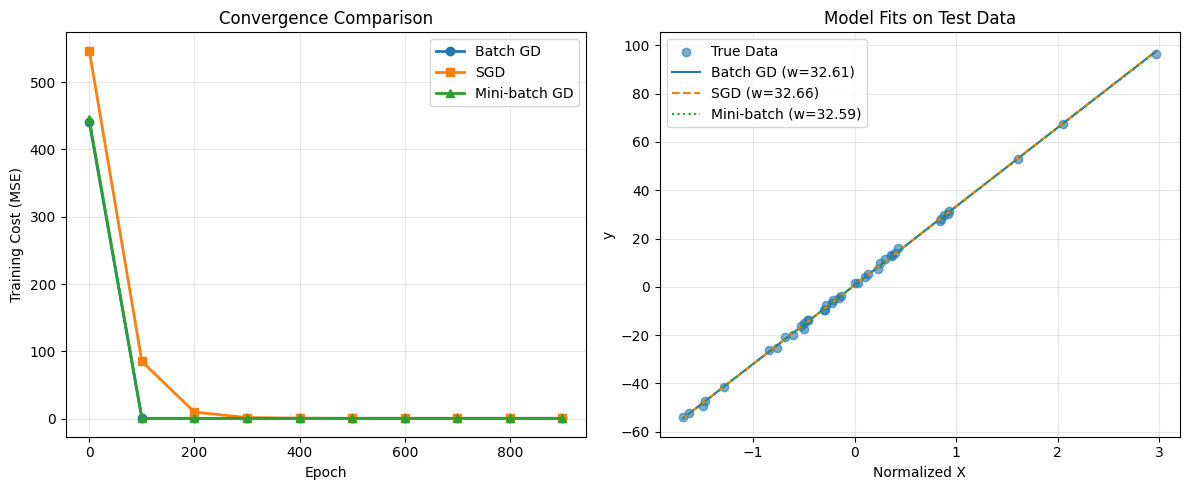

In [11]:
plt.figure(figsize=(12, 5))

# Plot 1: Cost vs Epoch
plt.subplot(1, 2, 1)
epochs_plot = np.arange(0, 1001, 100)
plt.plot(epochs_plot[:-1], cost_batch, 'o-', label='Batch GD', linewidth=2)
plt.plot(epochs_plot[:-1], cost_sgd,   's-', label='SGD', linewidth=2)
plt.plot(epochs_plot[:-1], cost_mini,  '^-', label='Mini-batch GD', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Cost (MSE)')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Final Model Fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, label='True Data')
x_line = np.linspace(X_test.min(), X_test.max(), 100)
plt.plot(x_line, w_batch * x_line + b_batch, label=f'Batch GD (w={w_batch:.2f})')
plt.plot(x_line, w_sgd   * x_line + b_sgd,   '--', label=f'SGD (w={w_sgd:.2f})')
plt.plot(x_line, w_mini  * x_line + b_mini,  ':',  label=f'Mini-batch (w={w_mini:.2f})')
plt.xlabel('Normalized X')
plt.ylabel('y')
plt.title('Model Fits on Test Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gradient_descent_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

What to expect:

Batch GD: smooth curve

SGD: jagged, erratic path

Mini-batch: slightly bumpy but fast convergence

All lines should overlap closely on the right plot-proving they learn the same function.

Step 11: Parameter Recovery Check

In [12]:
print("\n Parameter Recovery (True: w=3.5, b=2.0):")
print(f"   Batch GD      → w={w_batch:6.3f}, b={b_batch:6.3f}")
print(f"   Stochastic GD → w={w_sgd:6.3f},  b={b_sgd:6.3f}")
print(f"   Mini-batch GD → w={w_mini:6.3f},  b={b_mini:6.3f}")

# Denormalize weight to compare with true w=3.5
w_batch_denorm = w_batch / X_std
print(f"\n Denormalized Batch w: {w_batch_denorm:.3f} (close to 3.5!)")


 Parameter Recovery (True: w=3.5, b=2.0):
   Batch GD      → w=32.607, b= 0.666
   Stochastic GD → w=32.656,  b= 0.657
   Mini-batch GD → w=32.592,  b= 0.591

 Denormalized Batch w: 3.511 (close to 3.5!)


Because we normalized X, the learned w is scaled. To compare with the true w=3.5, we divide by X_std.


### Conclusion
This lab taught me the practical differences between GD variants:

Batch GD is accurate but slow-great for small datasets.
SGD is fast and helps escape local minima-but needs careful tuning.
Mini-batch GD is the industry standard (used in TensorFlow/PyTorch) because it balances speed and stability.
I also confirmed that feature normalization is essential-without it, GD either diverges or crawls.

Finally, all three methods converged to nearly identical solutions, proving that the math works—whether you use one sample or all!